In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    # sigmoid function for logestic regression
    return 1.0/(1.0+np.exp(-z))

In [3]:
def quality(w,b,data):
    #for testing data
    # given inputs are discriminating value,projection line vector,test data  
    #data=data.reset_index()
    Aclass=data["f"].tolist()                                                       #actual class data for final verification
    x=(data.drop(columns=['f']))                                      #data manuplation for logestic regression
                              
    aftestdata=sigmoid(np.dot(w,x.T)+b)                      # data after prediction
    a=[0 if x<0.5 else 1 for x in aftestdata]           #our classification into fake or not fake bank notes
    cor,tp,fp,fn,tn=0,0,0,0,0                                        # manging count of correct classifications
    
    for i in range(len(a)):
        if Aclass[i]==a[i]:
            cor=cor+1
        if Aclass[i]==1 and a[i]==1:
            tp=tp+1
        elif Aclass[i]==0 and a[i]==1:
            fp=fp+1
        elif Aclass[i]==1 and a[i]==0:
            fn=fn+1
        elif Aclass[i]==0 and a[i]==0:
            tn=tn+1
    
    
    if tp==0 :
        fscore=0
    else:
        prec=tp/(tp+fp)
        recall=tp/(tp+fn)
        fscore=2*((prec*recall)/(prec+recall))
    
    return (cor/len(a))*100,fscore                                  # returning %  of data classified correct and f score 

In [4]:
def logreg(w,b,train,epoch,eta,lam):
    #logestic regression with regularistion  l2 regularization
    y=train['f']
    x=train.drop(columns=['f'])
    
    m=len(y)
    old_cost=4             # is set to four  because maximum diifernce in cost is 2
    err=[]
    for i in range(epoch):
        
        ypred=sigmoid(np.dot(w,x.T)+b)
        
        
        cost=(sum(((y*np.log(ypred))+((1-y)*np.log((1-ypred))))))*(-1/m)+np.sum((lam/(2*m))*(np.dot(w,w.T)))
        
        if cost>old_cost:
            eta=eta/1.5
            
        w_grad=(1/m)*(np.dot((ypred-y),x))
        b_grad=(1/m)*(sum((ypred-y)))
   
        old_cost=cost
    
        w=(1-(eta*lam/m))*w-(eta*w_grad)
        b=b-(eta*b_grad)
        if i%10==0:
            err.append(cost)
    y=err
    x=[i*10 for i in range(len(err))]
    plt.plot(x,y)
    plt.xlabel("iterations",size=12)
    plt.ylabel("error",size=12)
    plt.show()
    print(cost)     
    return w,b

In [5]:
data=pd.read_csv("money.csv")

data=(data-data.min())/(data.max()-data.min()) #scaling of data to a range of 0-1 (normalization) 

#random state is a seed value.for a particular seed value gives same distribution always
train=data.sample(frac=0.8,random_state=200) 
test=data.drop(train.index) 
#print(train)
#print(test)

In [6]:
eta=100
epoch=3000
lam=0.125
w=np.array([1,2,3,4])
#w=np.random.random(4)
#w=np.random.randn(4)
b=1

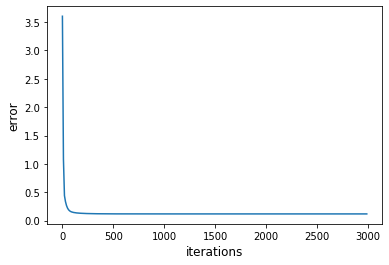

0.11875088063866082
[-17.9791106  -15.56075689 -16.48076287   0.87508762] 22.045764914586204


In [7]:

w,b=logreg(w,b,train,epoch,eta,lam)
    
print(w,b)

In [8]:
acctest,fsc=quality(w,b,test)
print("test set")
print(acctest,fsc)
print("train set")
acctrain,fsc=quality(w,b,train)
print(acctrain,fsc)
print(np.abs(acctrain-acctest))

test set
97.8102189781022 0.9752066115702478
train set
98.08743169398907 0.978978978978979
0.27721271588687557


In [9]:
#test set
#97.8102189781022 0.9752066115702478
#train set
#98.63387978142076 0.984894259818731
#0.8236608033185604

#lam=1
#test set
#95.98540145985402 0.9543568464730291
#train set
#96.90346083788707 0.96579476861167
#0.9180593780330497

#lam=0.5
#test set
#96.71532846715328 0.9629629629629629
#train set
#97.44990892531877 0.9719438877755511
#0.7345804581654818

#lam=0.25
#test set
#97.44525547445255 0.97119341563786
#train set
#97.72313296903461 0.974974974974975
#0.27787749458205724

#lam=0.125
#test set
#97.8102189781022 0.9752066115702478
#train set
#98.08743169398907 0.978978978978979
#0.27721271588687557

#lam=0.0625
#test set
#97.8102189781022 0.9752066115702478
#train set
#98.1785063752277 0.9799599198396793
#0.3682873971254992